# Introduction to Machine Learning (Lab 6)

- Instructor: Jaemin Jo (Sungkyunkwan University)
- Topics to cover: convex optimization and linear regression

## Convex Optimization

In [1]:
import cvxpy as cp
import numpy as np

### Unconstained Optimization

(1) Minimize $f(x, y) = (x-2)^4 + (x-2y)^2$

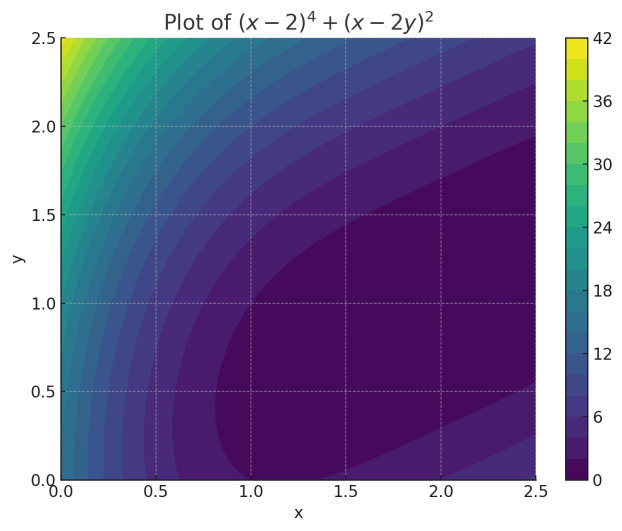


In [2]:
x, y = cp.Variable(), cp.Variable()

obj = cp.Minimize((x-2)**4 + (x-2*y)**2)

prob = cp.Problem(obj)
prob.solve()

print("status", prob.status)
print("optimal value", prob.value)
print("optimal var", x.value, y.value)

status optimal
optimal value 9.833561223765332e-47
optimal var 1.999999999996851 0.9999999999984255


(2) Maximize $f(x, y) = (x-2)^4 + (x-2y)^2$

In [3]:
x, y = cp.Variable(), cp.Variable()

obj = cp.Minimize(-((x-2)**4 + (x-2*y)**2)) # Minimize concave?

prob = cp.Problem(obj)
prob.solve()

print("status", prob.status)
print("optimal value", prob.value)
print("optimal var", x.value, y.value)

DCPError: Problem does not follow DCP rules. Specifically:
The objective is not DCP, even though each sub-expression is.
You are trying to minimize a function that is concave.

For more details, visit https://www.cvxpy.org/tutorial/dcp/index.html

>```cvxpy```는 convex(볼록) 형태를 최소화하거나, concave(오목)한 형태를 최대화할 수 있다. 
>
>주어진 함수의 형태는 현재 라이브러리에서 판단할 수 없기 때문에 최적화를 진행할 수 없다!

(3) Minimize $f(x) = x$

In [4]:
x = cp.Variable()

obj = cp.Minimize(x)

prob = cp.Problem(obj)
prob.solve()

print("status", prob.status)
print("optimal value", prob.value)
print("optimal var", x.value)

status unbounded
optimal value -inf
optimal var None


>Unbounded한 상황에서는 당연히 직선의 최대/최소를 구할 수 없다.

(4) Minimize $x^T A x + b^Tx + c$

where $A$ is positive definite.

The answer was $x = -\frac{1}{2}A^{-1}b$

>Numeric한 Answer는 x에 대해서 최적화하고자 하는 식을 편미분하면 구할 수 있다.
>
>이때 A는 PD라는 조건이 있기 때문에 Symmetric함을 알 수 있다.
>
>$f(x) = x^T A x + b^Tx + c$를 x에 대하여 편미분하면...
>
>=> $2x^T A + b^T = 0$
>
>=> $2 A^T x + b = 0$
>
>=> $A^Tx = -\frac{b}{2}$
>
>=> 따라서 $x = -\frac{1}{2}A^{-1}b$

In [5]:
x = cp.Variable(2)

A = np.array([[3, 1], [1, 3]])
b = np.array([3, 4])
c = 5

obj = cp.Minimize(cp.quad_form(x, A) + b.T @ x + c)

prob = cp.Problem(obj)
prob.solve()

print("status", prob.status)
print("optimal value", prob.value)
print("optimal var", x.value)


status optimal
optimal value 3.4062499999999996
optimal var [-0.3125 -0.5625]


In [7]:
from numpy.linalg import inv
x = -0.5 * inv(A) @ b
x

array([-0.3125, -0.5625])

In [8]:
x = cp.Variable(2)

A = np.array([[-3, -1], [-1, -3]]) # What if A is not positive definite?
b = np.array([3, 4])
c = 5

obj = cp.Minimize(cp.quad_form(x, A) + b.T @ x + c)

prob = cp.Problem(obj)
prob.solve()

print("status", prob.status)
print("optimal value", prob.value)
print("optimal var", x.value)

DCPError: Problem does not follow DCP rules. Specifically:
The objective is not DCP, even though each sub-expression is.
You are trying to minimize a function that is concave.

> $A$ 행렬이 PD가 아니라면 역행렬이 존재하지 않는다.
> 
> 왜냐하면 full-rank가 아니고, 이에 따라 선형 종속의 관계가 생기기 때문이다.
>
> 따라서 최적화를 진행할 수 없다.

(5) Minimize $f(x) = \frac{1}{2}|| Ax - b||^2_2$

The answer was $x = (A^T A)^{-1}A^Tb$

In [11]:
x = cp.Variable(3)

A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
b = np.array([10, 11, 12])

obj = cp.Minimize(0.5 * cp.norm(A @ x - b, 2)**2)

prob = cp.Problem(obj)
prob.solve()

print("status", prob.status)
print("optimal value", prob.value)
print("optimal var", x.value)

status optimal
optimal value 1.0886280492049963e-28
optimal var [-4.94262959  0.88525918  4.39070374]


In [12]:
x = inv(A.T @ A) @ A.T @ b
print(x) # the analytical soltuion is different from the numerical one?
print(0.5 * np.linalg.norm(A @ x - b, 2)**2)

[-29.5  35.5   0. ]
3817.3750000000005


In [13]:
from numpy.linalg import matrix_rank
matrix_rank(A.T @ A)

2

> 위 경우도 3X3 행렬의 rank가 2이다.
>
> 가역행렬이 아니기 때문에 $A^T A$를 구할 수 없다는 점에서 numeric 솔루션과 analytical solution에 차이가 발생한다.
>
> 당연히 역행렬이 존재하지 않는데 해석적으로 푸는것은 옳지 않기 떄문에 ```cvxpy```를 통한 최적화 해가 더 타당하다.

In [14]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 10]])

matrix_rank(A.T @ A)

3

In [15]:
x = cp.Variable(3)

b = np.array([10, 11, 12])

obj = cp.Minimize(0.5 * cp.norm(A @ x - b, 2)**2)

prob = cp.Problem(obj)
prob.solve()

print("status", prob.status)
print("optimal value", prob.value)
print("optimal var", x.value)

status optimal
optimal value 9.477832454650264e-25
optimal var [-9.33333333e+00  9.66666667e+00 -3.26824247e-12]


In [16]:
x = inv(A.T @ A) @ A.T @ b
x

array([-9.33333333e+00,  9.66666667e+00, -2.48689958e-13])

### Constrained Optimization

(6) Maximize $f(x, y) = ln(x) + ln(y)$ subject to $x + y = 10$

The answer was $2\cdot ln(5)$ at $x = y = 5$.


In [17]:
x = cp.Variable()
y = cp.Variable()

constraints = [x + y == 10]

obj = cp.Maximize(cp.log(x) + cp.log(y))

prob = cp.Problem(obj, constraints)
prob.solve()

print("status", prob.status)
print("optimal value", prob.value)
print("optimal var", x.value, y.value)

status optimal
optimal value 3.21887578291679
optimal var 5.0000001534782275 4.999999636764735


(7) Minimize $f(x) = ||x||_2^2$ subject to $x\cdot d = c$

The answer was $x = \frac{c}{d^T d}d$




In [18]:
x = cp.Variable(3)

d = np.array([1, 2, 3])
c = 5

obj = cp.Minimize(cp.norm(x) ** 2)
constraints = [x.T @ d == c]

prob = cp.Problem(obj, constraints)
prob.solve()

print("status", prob.status)
print("optimal value", prob.value)
print("optimal var", x.value)

status optimal
optimal value 1.7857142857142856
optimal var [0.35714286 0.71428571 1.07142857]


In [19]:
x = c / (d.T @ d) * d
x

array([0.35714286, 0.71428571, 1.07142857])

(8) Minimize $f(x) = \frac{1}{2}||x||_2^2$ subject to $Ax ≥ B$

In [20]:
A = np.array([[1, 2],
              [3, 4],
              [5, 6]])
b = np.array([1, 3, 5])

x = cp.Variable(2)

objective = cp.Minimize(0.5 * cp.norm(x, 2)**2)

constraints = [A @ x >= b]

prob = cp.Problem(objective, constraints)
prob.solve()


print("status", prob.status)
print("optimal value", prob.value)
print("optimal var", x.value)

status optimal
optimal value 0.20491803335498368
optimal var [0.40983759 0.49180201]


(9) Maximize $f(p_1, p_2, p_3) = -p_1 log\ p_1 - p_2 log\ p_2 - p_3 log\ p_3$ subject to $p_1 + p_2 + p_3 = 1$

In [21]:
x = cp.Variable()
y = cp.Variable()
z = cp.Variable()

constraints = [x + y + z == 1]

obj = cp.Maximize(x * cp.log(x) + y * cp.log(y) + z * cp.log(z)) # why not working?

prob = cp.Problem(obj, constraints)
prob.solve()

print("status", prob.status)
print("optimal value", prob.value)
print("optimal var", x.value, y.value)

DCPError: Problem does not follow DCP rules. Specifically:
The objective is not DCP. Its following subexpressions are not:
var236 @ log(var236)
var237 @ log(var237)
var238 @ log(var238)

> 이 경우는 최적화가 안되는 것이 아니라 $p_1 log(p_1)$과 같은 형태가 ```cvxpy```에서 지원하지 않기 때문이다.
>
> 아래 코드처럼 ```cp.entr()```을 사용하면 해결된다.

In [22]:
x = cp.Variable()
y = cp.Variable()
z = cp.Variable()

constraints = [x + y + z == 1]

obj = cp.Maximize(cp.entr(x) + cp.entr(y) + cp.entr(z))

prob = cp.Problem(obj, constraints)
prob.solve()

print("status", prob.status)
print("optimal value", prob.value)
print("optimal var", x.value, y.value, z.value)

status optimal
optimal value 1.098612288536377
optimal var 0.3333363569525698 0.3333314977231663 0.3333321442002238


In [23]:
cp.entr(x).curvature

'CONCAVE'

In [24]:
x.curvature

'AFFINE'

In [25]:
cp.log(x).curvature

'CONCAVE'

In [26]:
(x * cp.log(x)).curvature

'UNKNOWN'

> 위를 보면 알 수 있듯이, concave와 affine을 곱했다고 해서 concave가 아니다.
>
> 실제로 concave임을 증명하는 것은 매우 어렵다고 한다.
>
> 따라서 ```cvxpy```에서는 개발자가 사전에 concave인 함수들을 따로 정의한 것이다.

## Linear Regression

In [27]:
n = 100
X = np.random.uniform(0, 1, n)
noise = np.random.normal(0, 1, n)

y = 10 * X + noise

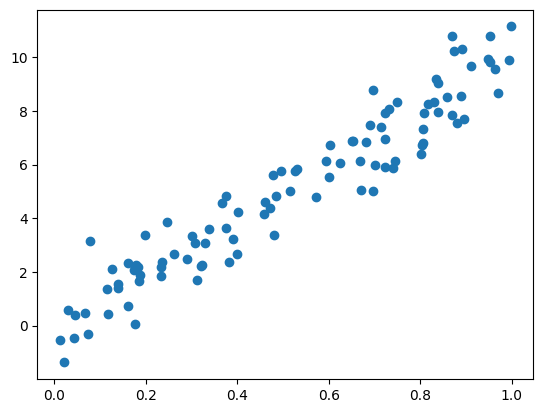

In [28]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.show()

In [29]:
X_prepend = np.column_stack((np.ones(n), X))
X_prepend

array([[1.        , 0.32960972],
       [1.        , 0.30715112],
       [1.        , 0.64967205],
       [1.        , 0.17891822],
       [1.        , 0.66698629],
       [1.        , 0.89156557],
       [1.        , 0.8295118 ],
       [1.        , 0.5708022 ],
       [1.        , 0.338149  ],
       [1.        , 0.16025228],
       [1.        , 0.83947   ],
       [1.        , 0.40165727],
       [1.        , 0.02067247],
       [1.        , 0.16054104],
       [1.        , 0.74541809],
       [1.        , 0.48454625],
       [1.        , 0.23247394],
       [1.        , 0.83844919],
       [1.        , 0.95126756],
       [1.        , 0.49508012],
       [1.        , 0.31173643],
       [1.        , 0.13817282],
       [1.        , 0.9525744 ],
       [1.        , 0.60175098],
       [1.        , 0.39062661],
       [1.        , 0.60072652],
       [1.        , 0.59437368],
       [1.        , 0.26077245],
       [1.        , 0.13972134],
       [1.        , 0.74086821],
       [1.

### Using Normal Equation

In [30]:
XtX = X_prepend.T @ X_prepend
Xty = X_prepend.T @ y

XtX_inv = np.linalg.inv(XtX)

beta = XtX_inv @ Xty

print("Coefficients:")
print(f"Intercept (beta_0): {beta[0]}")
print(f"Slope (beta_1): {beta[1]}")

Coefficients:
Intercept (beta_0): -0.147750968280155
Slope (beta_1): 10.112357512995127


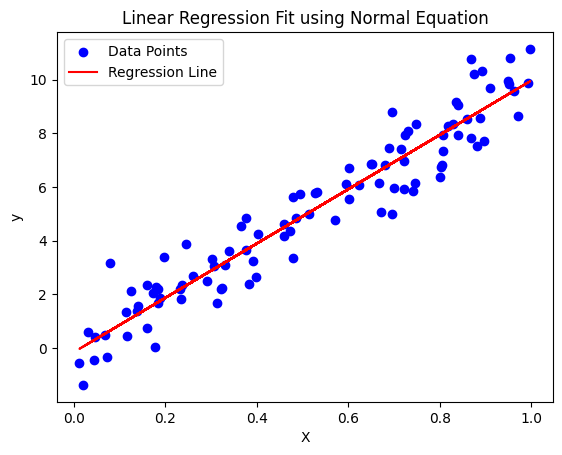

In [31]:
y_pred = X_prepend @ beta

plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit using Normal Equation')
plt.legend()
plt.show()

### Using Convex Optimization

In [32]:
beta_0 = cp.Variable()  # Intercept
beta_1 = cp.Variable()  # Slope

residuals = y - (beta_0 + beta_1 * X)

objective = cp.Minimize(cp.sum_squares(residuals))

problem = cp.Problem(objective)
problem.solve()

beta_0_value = beta_0.value
beta_1_value = beta_1.value

print("Optimal coefficients:")
print(f"Intercept (beta_0): {beta_0_value}")
print(f"Slope (beta_1): {beta_1_value}")

Optimal coefficients:
Intercept (beta_0): -0.14775096828015988
Slope (beta_1): 10.112357512995139


> 여기서는 회귀분석의 해를 정규 방정식이 아닌 최적화를 통해서 LSE로 해결하고 있다.
> 
> 최적화를 통해 잔차의 제곱합을 최소화하는 절편과 기울기를 찾고 있는데, 이는 실제로 LSE를 의미한다.

### Using Scikit-Learn

In [33]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X.reshape(-1, 1), y)

beta_0 = model.intercept_
beta_1 = model.coef_[0]

print("Optimal coefficients:")
print(f"Intercept (beta_0): {beta_0}")
print(f"Slope (beta_1): {beta_1}")

Optimal coefficients:
Intercept (beta_0): -0.14775096828015588
Slope (beta_1): 10.112357512995132


### $R^2$ for Measuring Goodness of Fit

$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$

$SS_{res} = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2$

$SS_{tot} = \sum_{i=1}^{n}(y_i - \bar{y})^2$


In [34]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.9154351967389509

In [35]:
r2_score(y, np.ones(n) * np.mean(y))

0.0

> 단순하게 모델이 주어진 데이터에 대해 항상 평균값을 예측하는 경우에는 R square 값이 0이다.

In [36]:
# R^2 can be negative!

r2_score(y, np.ones(n) * (np.mean(y)-10))

-10.419193069056346

## Practice

(P1) Given $N$ numbers, $A_i$, find $m$ that minimizes the squared error, i.e., $\sum_{i=1}^N(A_i-m)^2$. Show that $m$ corresponds to the mean of the numbers, i.e., $m=\frac{1}{N}\sum_{i=1}^N A_i$

Hint: Use $cp.sum\_squares$

In [46]:
# Minimize the error using cvxpy

N = 10
A = np.random.uniform(0, 100, N)

m = cp.Variable()

obj = cp.Minimize(cp.sum_squares(A - m))

prob = cp.Problem(obj)
prob.solve()

print("status", prob.status)
print("optimal value", prob.value)
print("optimal var", m.value)

status optimal
optimal value 7824.328600708217
optimal var 55.30383241184603


In [47]:
# Compute the mean
m = np.mean(A)
np.sum((A - m)**2)

7824.328600708217

(P2) Under the same constraints, find $m$ that minimizes the absolute error, i.e., $\sum_{i=1}^N|A_i-m|$, and show that it is the median of the numbers.

In [48]:
# Minimize the error using cvxpy

N = 10
A = np.random.uniform(0, 100, N)

m = cp.Variable()

obj = cp.Minimize(cp.norm(A - m, 1)) # 1차 노름은 절대값의 합

prob = cp.Problem(obj)
prob.solve()

print("status", prob.status)
print("optimal value", prob.value)
print("optimal var", m.value)

status optimal
optimal value 224.36449238569227
optimal var 64.90245118198798


In [49]:
# Compute the median and show the minimum

m = np.median(A)
np.sum(np.abs(A-m))

224.36449238569224

(P3) Given $x_1=0.5, x_2=0.3, x_3=0.2$, find $y1, y2, y3$ that minimizes $\sum_{i=1}^3 x_i log(\frac{x_i}{y_i})$ subject to $y1+y2+y3=1$

Hint: What function in CVXPY computes $x \cdot log(\frac{x}{y})$?

What happens if there is no constraint?

In [50]:
# Minimize the error using cvxpy

x1 = 0.5
x2 = 0.3
x3 = 0.2

y1 = cp.Variable()
y2 = cp.Variable()
y3 = cp.Variable()

obj = cp.Minimize(cp.rel_entr(x1, y1) + cp.rel_entr(x2, y2) + cp.rel_entr(x3, y3))
constraints = [y1 + y2 + y3 == 1]

prob = cp.Problem(obj, constraints)
prob.solve()

print("status", prob.status)
print("optimal value", prob.value)
print("optimal var", y1.value, y2.value, y3.value)

status optimal
optimal value 1.0727642525517306e-09
optimal var 0.49999982574829693 0.29999878637075494 0.2000013868154772


## For more details

- CVXPY tutorial: https://www.cvxpy.org/version/1.2/tutorial/intro/index.html
- What is DCP?: https://www.cvxpy.org/version/1.2/tutorial/dcp/index.html
- Functions you can use in CVXPY: https://www.cvxpy.org/version/1.2/tutorial/functions/index.html
